# Part II: Template matching
Completed by: Liliya Panfilova

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Opening images
query_image = cv.imread('Trillium_s.jpg')
template_image = cv.imread('Trillium_t.jpg')

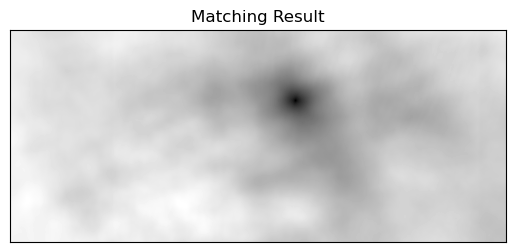

In [27]:
# Performing template matching with TM_SQDIFF measure
result = cv.matchTemplate(query_image, template_image, cv.TM_SQDIFF)
plt.imshow(result,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])

# Finding the location of the best match
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)

# Getting the dimensions of the template image
template_height = template_image.shape[0]
template_width = template_image.shape[1]

# Drawing a rectangle around the best match
top_left = min_loc
bottom_right = (top_left[0] + template_width, top_left[1] + template_height)
cv.rectangle(query_image, top_left, bottom_right, (0, 255, 0), 2)

# Showing image
cv.imshow('Detected Point', query_image)
k = cv.waitKey(0)
cv.destroyAllWindows()

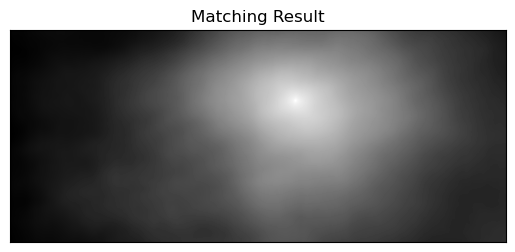

In [30]:
# Opening images
query_image = cv.imread('Trillium_s.jpg')
template_image = cv.imread('Trillium_t.jpg')

# Performing template matching with TM_CCORR measure
result = cv.matchTemplate(query_image, template_image, cv.TM_CCORR)
plt.imshow(result,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])

# Finding the location of the best match
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)

# Getting the dimensions of the template image
template_height = template_image.shape[0]
template_width = template_image.shape[1]

# Drawing a rectangle around the best match
top_left = max_loc
bottom_right = (top_left[0] + template_width, top_left[1] + template_height)
cv.rectangle(query_image, top_left, bottom_right, (0, 255, 0), 2)

# Showing image
cv.imshow('Detected Point', query_image)
k = cv.waitKey(0)
cv.destroyAllWindows()

Resized image height:  720
Resized image width:  1280
Center:  (640, 360)


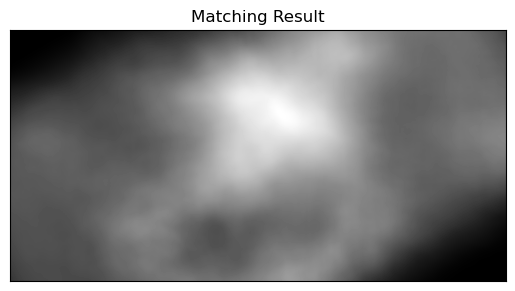

In [11]:
# Opening images
query_image = cv.imread('Trillium_s.jpg')
template_image = cv.imread('Trillium_t.jpg')

# Resizing the query image to double both width and height
resized_image = cv.resize(query_image, None, fx=2, fy=2, interpolation=cv.INTER_CUBIC)

# Getting the dimensions of the template image
template_height = template_image.shape[0]
template_width = template_image.shape[1]
# print("Template image height: ", template_height)
# print("Template image width: ", template_width)

# Getting the dimensions of the resized image
resized_height = resized_image.shape[0]
resized_width = resized_image.shape[1]
print("Resized image height: ", resized_height)
print("Resized image width: ", resized_width)

# Calculating the rotation matrix for a 30-degree rotation around the center
center = (resized_width // 2, resized_height // 2)
print("Center: ", center)
rotation_matrix = cv.getRotationMatrix2D(center, 30, 1.0)

# Applying the rotation to the query image
rotated_resized_image = cv.warpAffine(resized_image, rotation_matrix, (resized_width, resized_height))

# Performing template matching with TM_CCORR measure
result = cv.matchTemplate(rotated_resized_image, template_image, cv.TM_CCORR)
plt.imshow(result,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])

# Finding the location of the best match
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)

# Drawing a rectangle around the best match
template_height_scaled = template_height * 2
template_width_scaled = template_width * 2
top_left = max_loc
bottom_right = (top_left[0] + template_width_scaled, top_left[1] + template_height_scaled)
cv.rectangle(rotated_resized_image, top_left, bottom_right, (0, 255, 0), 2)

# Showing image
cv.imshow('Detected Point', rotated_resized_image)
k = cv.waitKey(0)
cv.destroyAllWindows()